In [7]:
import pandas as pd
import numpy as np

# Step 1: Load the CSV file
input_file = '../../data-01234567/vns_responses.csv'  # Replace with your actual file name
df = pd.read_csv(input_file)

In [8]:
df.head()

,time,0,1,2,3,4,5,6,7,8,...,13692,13693,13694,13695,13696,13697,13698,13699,13700,13701
0,0.0,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,...,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
1,0.1,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,...,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
2,0.2,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,...,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
3,0.3,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,...,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018
4,0.4,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,...,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018,0.000018


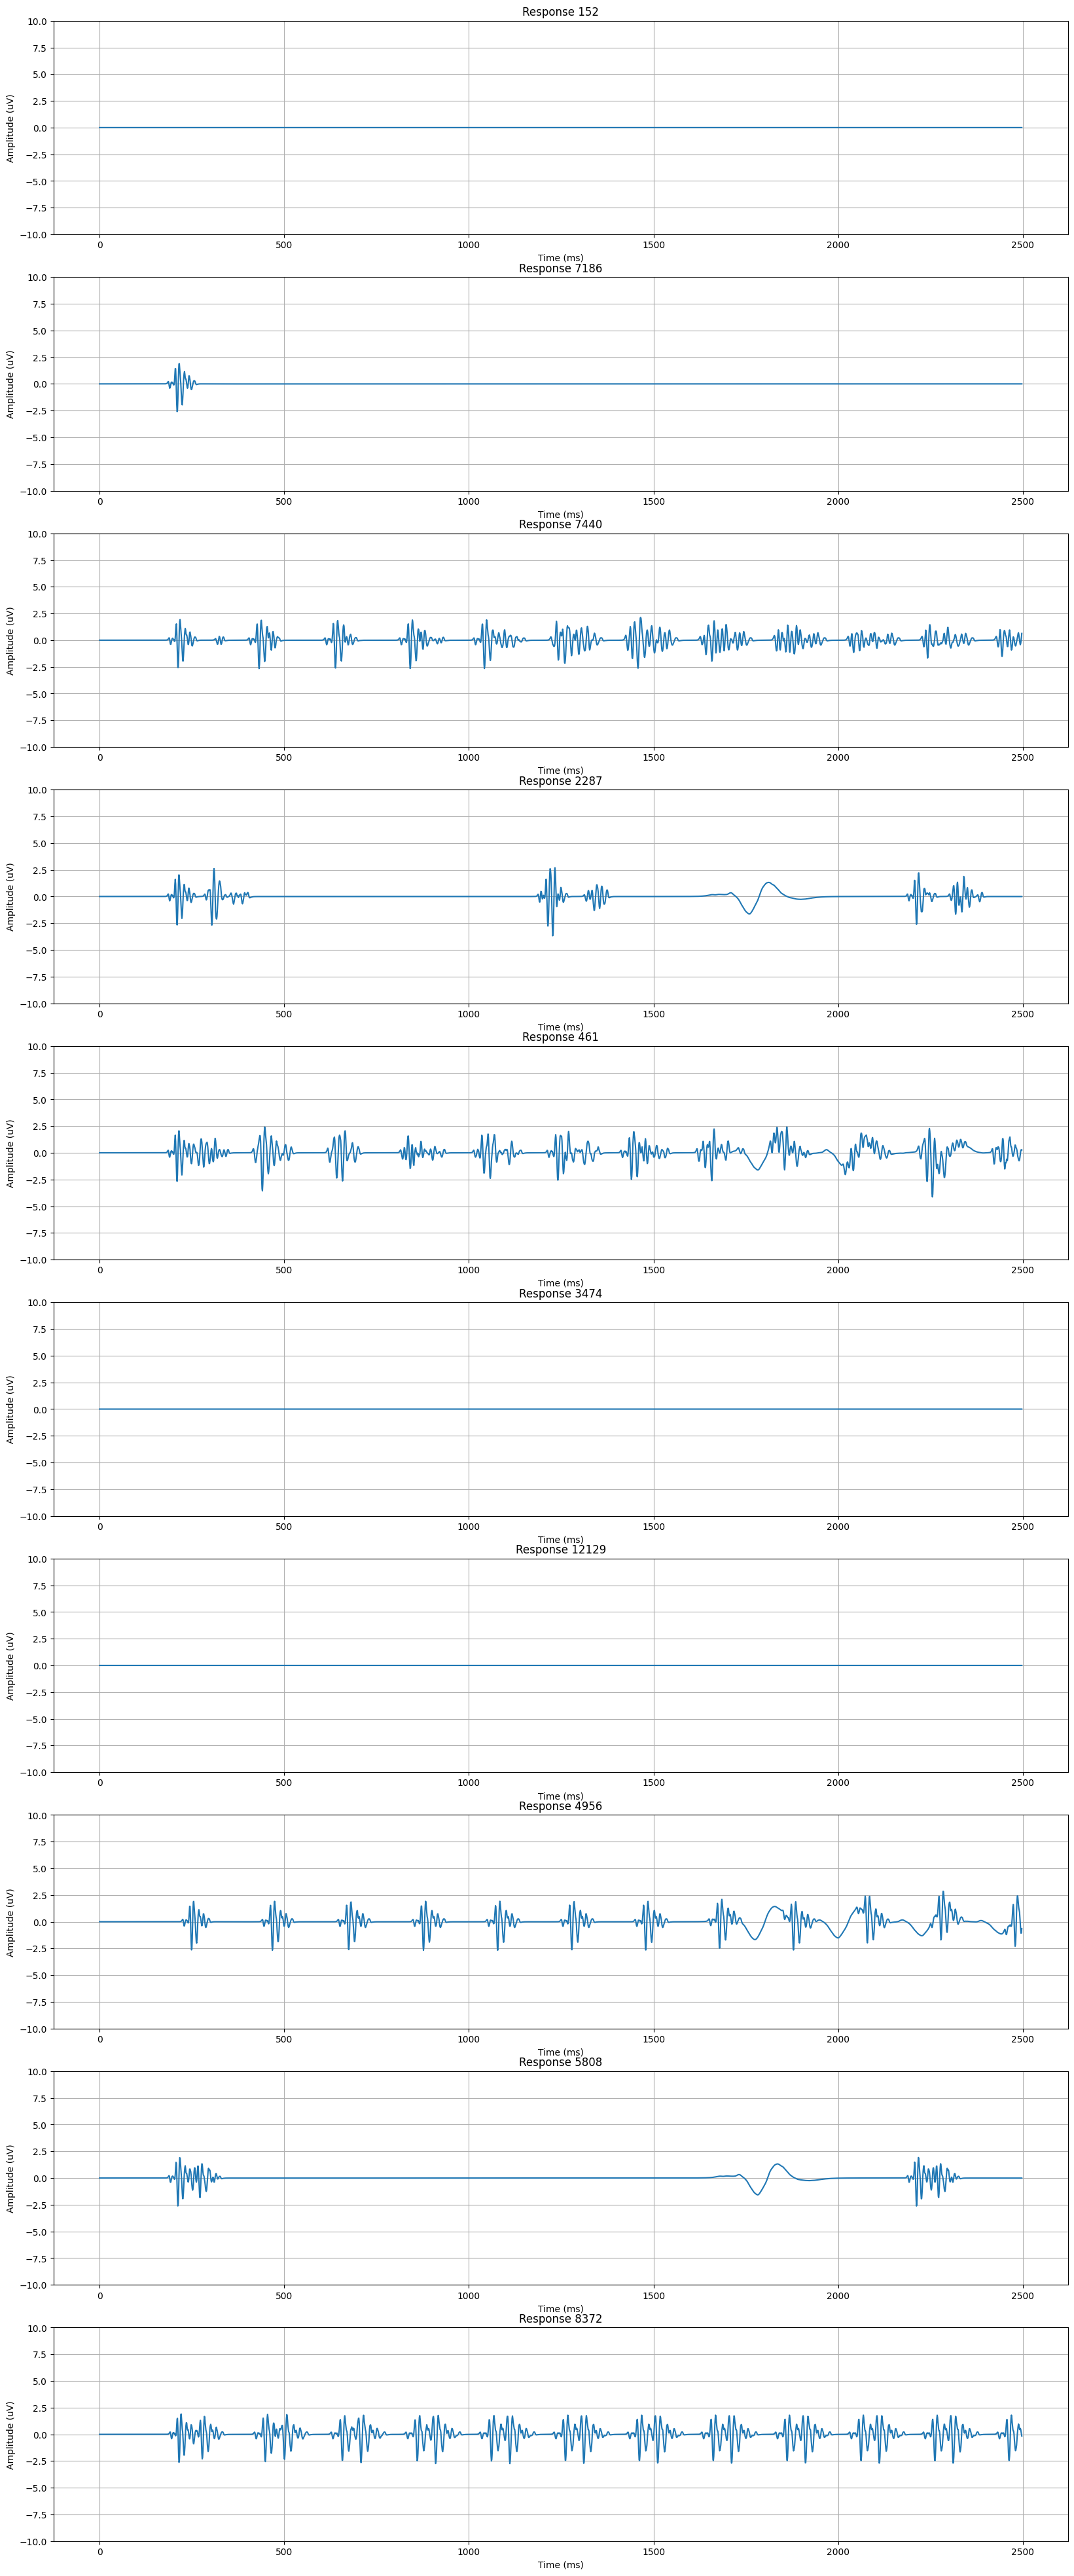

In [9]:
import matplotlib.pyplot as plt

random_id = np.random.randint(0, len(df.columns)-1, 10)

fig, ax = plt.subplots(10, 1, figsize=(20, 50))
for i, id in enumerate(random_id):
    ax[i].plot(df[str(id)].values)
    ax[i].set_title('Response {}'.format(id))
    ax[i].set_xlabel('Time (ms)')
    ax[i].set_ylabel('Amplitude (uV)')
    ax[i].set_ylim(-10, 10)
    ax[i].grid(True)

In [18]:

# Step 2: Define the noise parameters and function to add noise with stochasticity
def add_noise_with_stochasticity(signal, fs):
    # Generate Gaussian White Noise (Thermal noise)
    mean = 0
    std_dev = 0.2
    gwn = np.random.normal(mean, std_dev, len(signal))

    # Add Electromagnetic Interference (e.g., 60 Hz powerline noise)
    emi_frequency = 50  # 50z
    emi_amplitude = np.random.uniform(0.05, 0.1)  # Stochastic amplitude
    t = np.arange(len(signal)) / fs
    emi_noise = emi_amplitude * np.sin(2 * np.pi * emi_frequency * t)

    # Add Biological Noise with stochastic frequency and amplitude
    bio_noise = np.zeros(len(signal))
    for i in range(3):
        bio_frequency = np.random.uniform(5, 20)  # Stochastic frequency between 8-12 Hz
        bio_amplitude = np.random.uniform(0.03, 0.05)  # Stochastic amplitude
        bio_noise += bio_amplitude * np.sin(2 * np.pi * bio_frequency * t)

    # Add Instrumental Noise (random noise, can also be Gaussian)
    instrumental_noise = np.random.normal(mean, std_dev/2, len(signal))

    # Add Environmental Noise (low-frequency drift, modeled as 1/f noise)
    env_noise = np.random.uniform(0.02, 0.05) * np.random.randn(len(signal))
    env_noise = np.cumsum(env_noise) / fs  # Integrate to simulate drift

    # Combine all noise sources
    noisy_signal = signal + gwn + emi_noise + bio_noise + instrumental_noise + env_noise
    return noisy_signal

# Step 3: Apply noise to each signal column
fs = 10000  # Sampling frequency, adjust based on your data

df_noisy = df.copy()
for column in df.columns[1:]:  # Skip the first column (timestamp)
    df_noisy[column] = add_noise_with_stochasticity(df_noisy[column].values, fs)


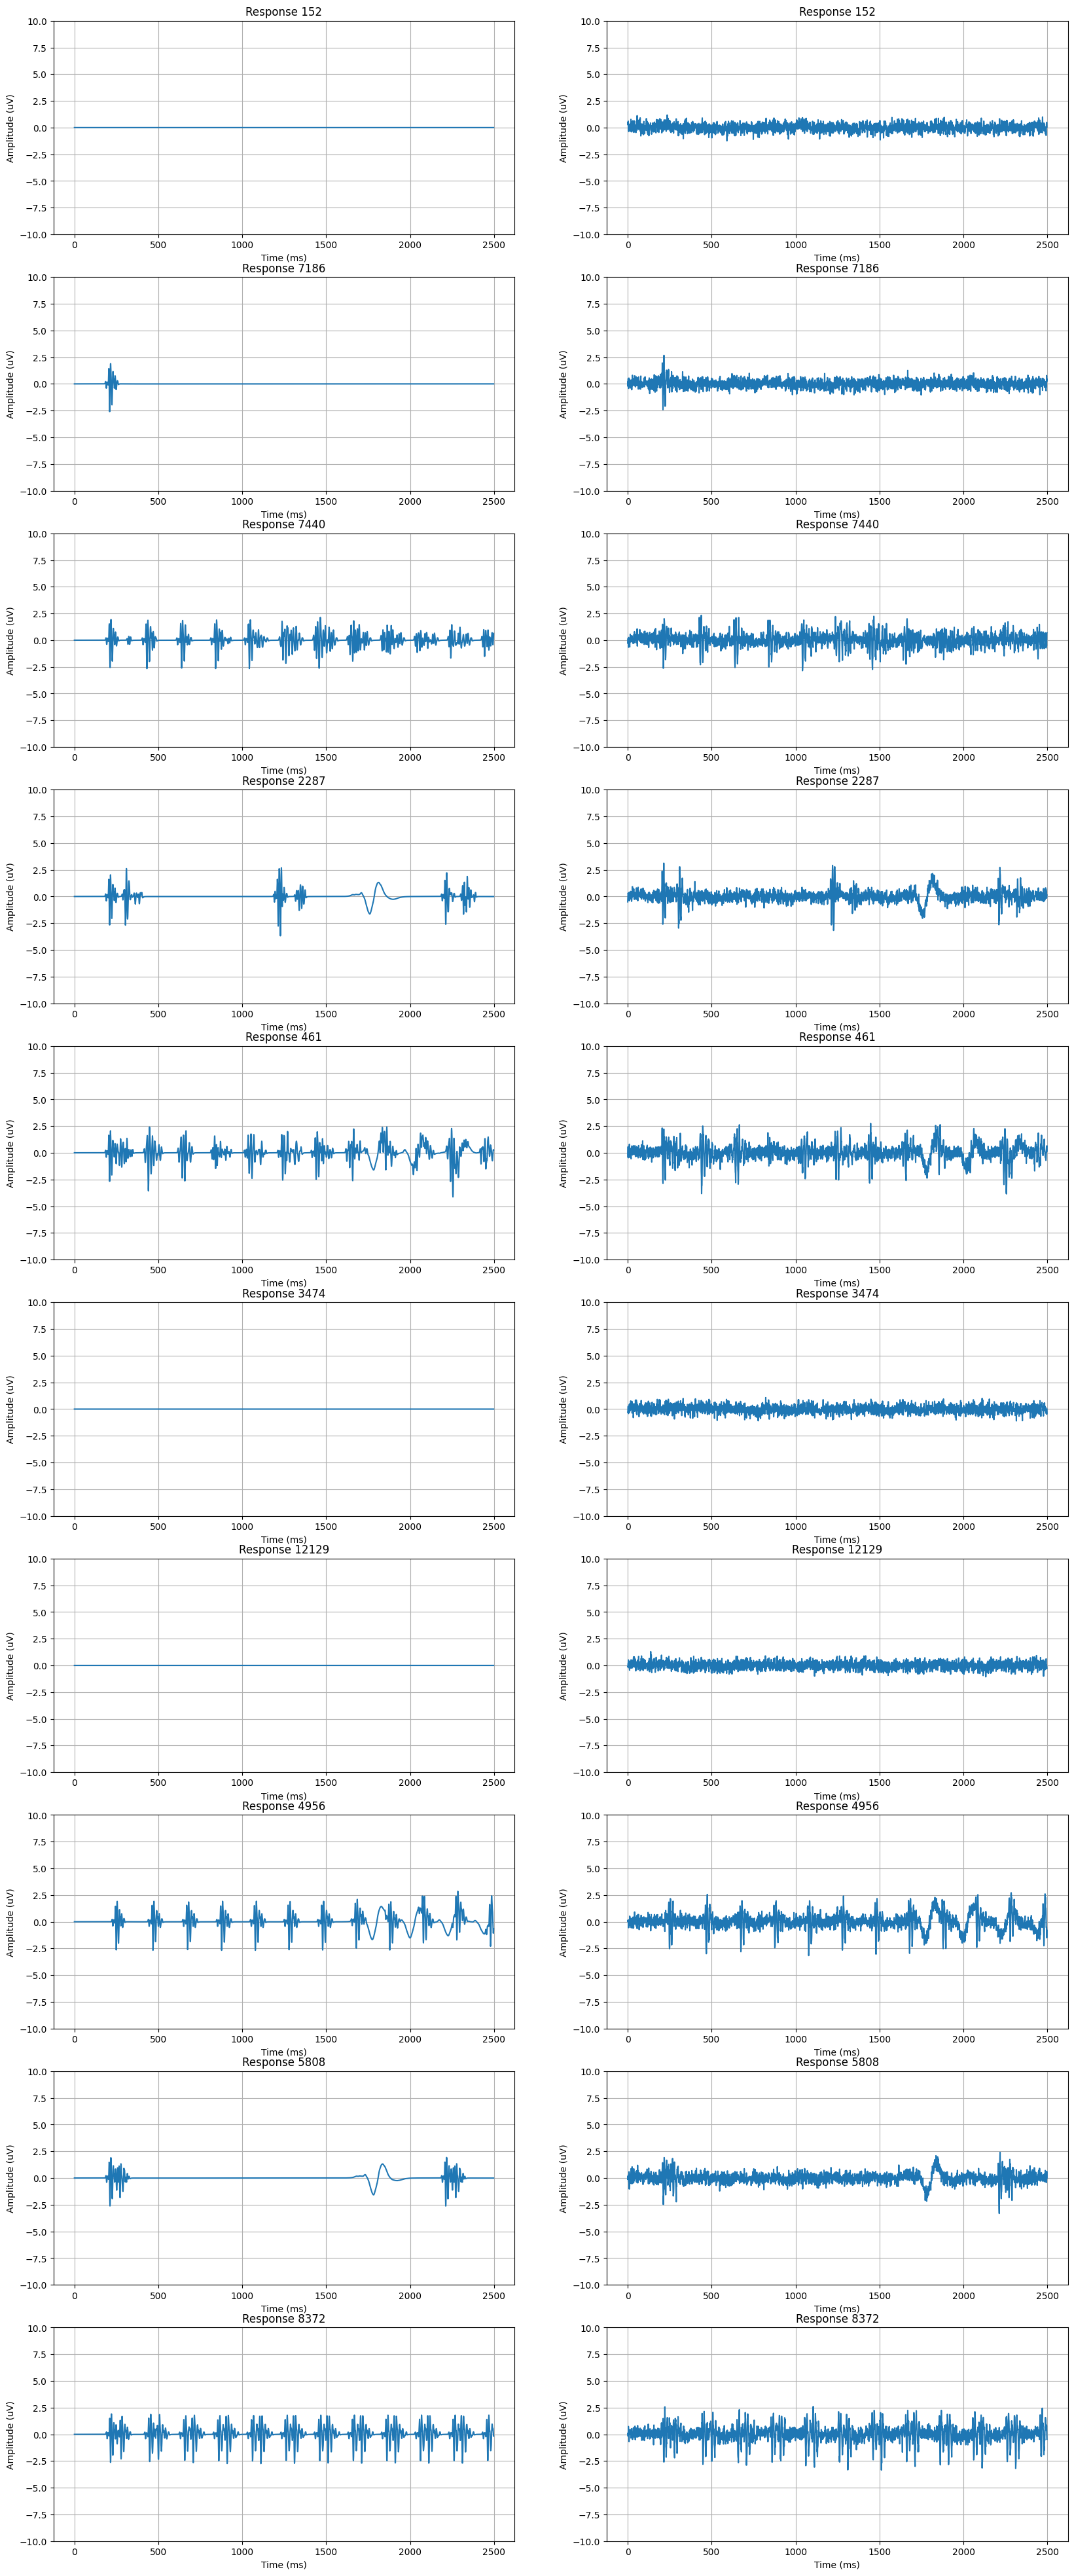

In [19]:
fig, ax = plt.subplots(10, 2, figsize=(20, 50))
for i, id in enumerate(random_id):
    ax[i, 0].plot(df[str(id)].values)
    ax[i, 0].set_title('Response {}'.format(id))
    ax[i, 0].set_xlabel('Time (ms)')
    ax[i, 0].set_ylabel('Amplitude (uV)')
    ax[i, 0].set_ylim(-10, 10)
    ax[i, 0].grid(True)

    ax[i, 1].plot(df_noisy[str(id)].values)
    ax[i, 1].set_title('Response {}'.format(id))
    ax[i, 1].set_xlabel('Time (ms)')
    ax[i, 1].set_ylabel('Amplitude (uV)')
    ax[i, 1].set_ylim(-10, 10)
    ax[i, 1].grid(True)



In [20]:

# Step 4: Save the processed data to a new CSV file
output_file = '../../data-01234567/vns_responses_noisy.csv'  # Replace with your desired output file name
df_noisy.to_csv(output_file, index=False)

print(f"Processed data with stochastic noise saved to {output_file}")


Processed data with stochastic noise saved to ../../data-01234567/vns_responses_noisy.csv
